In [1]:
!pip install factor_analyzer

In [1]:
# Load Packages
import numpy as np
import pandas as pd
#from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
from factor_analyzer import FactorAnalyzer
#from sklearn import datasets
from sklearn.decomposition import PCA


In [2]:
#trees_dry_season = 'C:\\Data\\UP\\MIT-2023\\MIT808\\Project-Data\\s1_modelling_data_dry_season.csv'
trees_dry_season = 'C:\\Data\\UP\\MIT-2023\\MIT808\\Project-Data\\Training_Data\\S1\\s1_modelling_data_dry_season.csv'
#CSV file was derived from the dbf file on Google drive and dowloaded onto local

#baobab_df = pd.read_csv('/content/S1_Baobab.csv', delimiter=';')
#Read data fromm csv files
trees_df = pd.read_csv(trees_dry_season, delimiter=';')

print('shape of df1',trees_df.shape)


trees_df.head()
#df_all.tail()

shape of df1 (668, 30)


,ID,Species,x_coord,y_coord,Colour,reflectanc,Red,Green,Blue,NIR,...,band_2_ene,band_2_std,band_3_con,band_3_cor,band_3_ene,band_3_std,band_4_con,band_4_cor,band_4_ene,band_4_std
0,1,Baobab,30.068125,-22.330583,blue,431.113040,315.440467,299.952520,316.529584,423.622352,...,0.990499,0.067884,0.046825,0.100865,0.950509,0.162585,0.154762,0.675463,0.626354,0.487498
1,2,Baobab,30.068139,-22.330583,blue,432.238426,317.123448,302.154127,318.277575,424.122717,...,0.990499,0.067884,0.046032,0.103071,0.951284,0.157994,0.162698,0.657316,0.623695,0.488698
2,3,Baobab,30.068153,-22.330583,blue,433.449074,318.964207,304.552228,320.182615,424.634039,...,0.990499,0.067884,0.046032,0.103071,0.951284,0.157994,0.165079,0.654921,0.619508,0.490760
3,4,Baobab,30.068167,-22.330583,blue,435.140818,321.328707,307.428050,322.492330,425.617969,...,0.990499,0.067884,0.046032,0.103071,0.951284,0.157994,0.173810,0.637535,0.613905,0.490148
4,5,Baobab,30.068181,-22.330583,blue,437.430941,323.891161,310.475530,324.929145,426.750913,...,0.988920,0.078325,0.047619,0.098712,0.949734,0.162585,0.173810,0.634727,0.616900,0.487847


Standardise the Reflectance values

In [3]:
# Define a scaler object
scaler = MinMaxScaler()

# List columns that need to be standardised
cols = ['reflectanc','Red','Green','Blue','NIR','NDVI','EVI','MTVI','GNDVI','band_1_con','band_1_cor','band_1_ene','band_1_std','band_2_con','band_2_cor','band_2_ene','band_2_std','band_3_con','band_3_cor','band_3_ene','band_3_std','band_4_con','band_4_cor','band_4_ene','band_4_std']

trees_df[cols] = trees_df[cols].astype(float)

# =Scale the columns using the scaler object
trees_df[cols] = scaler.fit_transform(trees_df[cols])

trees_df

,ID,Species,x_coord,y_coord,Colour,reflectanc,Red,Green,Blue,NIR,...,band_2_ene,band_2_std,band_3_con,band_3_cor,band_3_ene,band_3_std,band_4_con,band_4_cor,band_4_ene,band_4_std
0,1,Baobab,30.068125,-22.330583,blue,0.338900,0.433634,0.361544,0.412575,0.237941,...,0.963432,0.152894,0.295,0.101222,0.873586,0.325236,0.729560,0.303388,0.253165,0.475025
1,2,Baobab,30.068139,-22.330583,blue,0.346385,0.441837,0.380710,0.432989,0.241303,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.792453,0.233795,0.245149,0.478046
2,3,Baobab,30.068153,-22.330583,blue,0.354438,0.450810,0.401587,0.455238,0.244739,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.811321,0.224611,0.232525,0.483239
3,4,Baobab,30.068167,-22.330583,blue,0.365690,0.462335,0.426623,0.482213,0.251350,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.880503,0.157939,0.215630,0.481699
4,5,Baobab,30.068181,-22.330583,blue,0.380922,0.474825,0.453153,0.510672,0.258962,...,0.957355,0.176410,0.300,0.099070,0.871607,0.325236,0.880503,0.147171,0.224660,0.475904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,15,Shepherd,30.072736,-22.317931,red,0.447182,0.571294,0.505024,0.539046,0.270799,...,1.000000,0.000000,0.350,0.626786,0.728525,0.545837,0.496855,0.486573,0.358384,0.445666
664,16,Shepherd,30.072937,-22.317931,red,0.323978,0.483477,0.433885,0.507089,0.116325,...,1.000000,0.000000,0.080,0.572671,0.945470,0.240428,0.830189,0.260140,0.178506,0.504452
665,17,Shepherd,30.072924,-22.317847,red,0.284290,0.456613,0.402745,0.475934,0.080680,...,1.000000,0.000000,0.050,0.371256,0.973694,0.156681,0.886792,0.174171,0.194890,0.489223
666,18,Shepherd,30.072625,-22.317222,red,0.434404,0.549215,0.500076,0.540676,0.193638,...,1.000000,0.000000,0.175,0.519209,0.889354,0.337477,0.761006,0.178348,0.323349,0.435867


Perform a PCA analysis to pick up relevant features for analysis

In [4]:
pca_trees_df = trees_df.drop(['ID','Species','Colour','x_coord','y_coord'], axis=1)
pca_trees_df.head()

,reflectanc,Red,Green,Blue,NIR,NDVI,EVI,MTVI,GNDVI,band_1_con,...,band_2_ene,band_2_std,band_3_con,band_3_cor,band_3_ene,band_3_std,band_4_con,band_4_cor,band_4_ene,band_4_std
0,0.338900,0.433634,0.361544,0.412575,0.237941,0.293392,0.629951,0.334551,0.453855,0.310680,...,0.963432,0.152894,0.295,0.101222,0.873586,0.325236,0.729560,0.303388,0.253165,0.475025
1,0.346385,0.441837,0.380710,0.432989,0.241303,0.284484,0.630332,0.324969,0.434135,0.310680,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.792453,0.233795,0.245149,0.478046
2,0.354438,0.450810,0.401587,0.455238,0.244739,0.274619,0.630715,0.314316,0.412565,0.310680,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.811321,0.224611,0.232525,0.483239
3,0.365690,0.462335,0.426623,0.482213,0.251350,0.263695,0.631013,0.302471,0.389735,0.310680,...,0.963432,0.152894,0.290,0.103427,0.875566,0.316053,0.880503,0.157939,0.215630,0.481699
4,0.380922,0.474825,0.453153,0.510672,0.258962,0.252304,0.631260,0.290064,0.366486,0.330097,...,0.957355,0.176410,0.300,0.099070,0.871607,0.325236,0.880503,0.147171,0.224660,0.475904


In [5]:
from sklearn.decomposition import PCA
pca_trees = PCA(n_components=3)
principalComponents_trees = pca_trees.fit_transform(pca_trees_df)

In [6]:
principal_trees_df = pd.DataFrame(data = principalComponents_trees,
                                  columns = ['PCA-1', 'PCA-2', 'PCA-3'])
principal_trees_df.head()

,PCA-1,PCA-2,PCA-3
0,-0.240640,1.073043,0.231034
1,-0.261299,1.097025,0.178020
2,-0.262896,1.107388,0.143428
3,-0.277469,1.133370,0.084796
4,-0.239095,1.147421,0.037191


In [7]:
print('Explained variation per principal component: {}'.format(pca_trees.explained_variance_ratio_))

#print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))



Explained variation per principal component: [0.35320845 0.24449228 0.17026712]


Build SVM model
Split the data into a training set and a testing set

In [54]:
ID = trees_df['ID']
Colour = trees_df['Colour']
#ID.shape

#trees_df_train = principal_trees_df
pca_trees_df = principal_trees_df.join(ID)
pca_trees_df = pca_trees_df.join(Colour)
# reorder the columns
pca_trees_df = pca_trees_df.reindex(columns=['ID','PCA-1','PCA-2','PCA-3','Colour'])

#df['Courses'] = df['Courses'].replace('Spark','Apache Spark')

pca_trees_df.head()
#print(ID)



,ID,PCA-1,PCA-2,PCA-3,Colour
0,1,-0.240640,1.073043,0.231034,blue
1,2,-0.261299,1.097025,0.178020,blue
2,3,-0.262896,1.107388,0.143428,blue
3,4,-0.277469,1.133370,0.084796,blue
4,5,-0.239095,1.147421,0.037191,blue


Convert colours into nummeric values


In [55]:
#Convert colours into nummeric values
pca_trees_df['Colour'] = pca_trees_df['Colour'].replace(['blue','purple','red','orange'],['1','2','3','4'])
pca_trees_df = pca_trees_df.rename(columns={'Colour':'Species'})

pca_trees_df

,ID,PCA-1,PCA-2,PCA-3,Species
0,1,-0.240640,1.073043,0.231034,1
1,2,-0.261299,1.097025,0.178020,1
2,3,-0.262896,1.107388,0.143428,1
3,4,-0.277469,1.133370,0.084796,1
4,5,-0.239095,1.147421,0.037191,1
5,6,-0.204490,1.164121,-0.008991,1
6,7,-0.155297,1.104201,-0.047966,1
7,8,-0.252903,1.081004,0.237016,1
8,9,-0.272441,1.103160,0.186943,1
9,10,-0.276536,1.114879,0.151010,1


In [56]:

#Split data into Train and Test
trees_df_train = pca_trees_df.sample(frac = 0.7)
trees_df_test = pca_trees_df.drop(trees_df_train.index)


In [57]:
X = pca_trees_df.iloc[:,[1,2,3]]
Y = pca_trees_df.iloc[:,4]
Y.head()


0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: object

In [58]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.30, random_state=0)

print("Training data:", X_Train.shape)
print("Training data:", X_Test.shape)
print("Training data:", X_Test.head())

Training data: (467, 3)
Training data: (201, 3)
Training data:         PCA-1     PCA-2     PCA-3
579  0.954369  0.010070 -0.398841
310 -0.730433  0.018546 -0.188674
14  -0.263019  1.080059  0.240421
541  0.383658 -0.674168  1.433137
76   0.459293 -0.122179 -0.078410


Serach for Best OneClass Model classifier and its parameters using Grid Search

In [15]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# define the One-Class SVM model
one_class_model = OneClassSVM()

# define the cross-validation scheme
cv = 10

param_grid = {'kernel': ['rbf', 'sigmoid', 'linear'], 
              'nu': [0.01, 0.1, 0.5, 0.9], 
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(estimator = one_class_model, param_grid = param_grid, cv = cv, scoring = 'accuracy')
grid_search.fit(X_Train, Y_Train)

GridSearchCV(cv=10, estimator=OneClassSVM(),
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear'],
                         'nu': [0.01, 0.1, 0.5, 0.9]},
             scoring='accuracy')

In [18]:
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.01}


In [19]:
y_test = Y_Test

y_test = pd.DataFrame(Y_Test)
y_test['known_class'] = 1
y_test = y_test.drop(['Colour'], axis = 1)
#y_test.at[14, 'known_class'] = -1
#y_test.at[579, 'known_class'] = -1
#y_test.at[354, 'known_class'] = -1

#display(y_test)


In [20]:
# get the best hyperparameters and test the model
best_model = grid_search.best_estimator_
Y_Pred = best_model.predict(X_Test)

accuracy = accuracy_score(y_test, Y_Pred)

#display(Y_Pred)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [21]:
print('best model accuracy:', accuracy)

best model accuracy: 1.0


In [28]:
# Check the model performance
print(classification_report(y_test, Y_Pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       201

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



Oneclass SVM to train Classifier on Required tree species

In [23]:
conf_matrix = confusion_matrix(y_test, Y_Pred)

# create the DataFrame with labels
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0
0,201


Confusion Matrix Heat Map


Text(50.722222222222214, 0.5, 'Actual Labels')

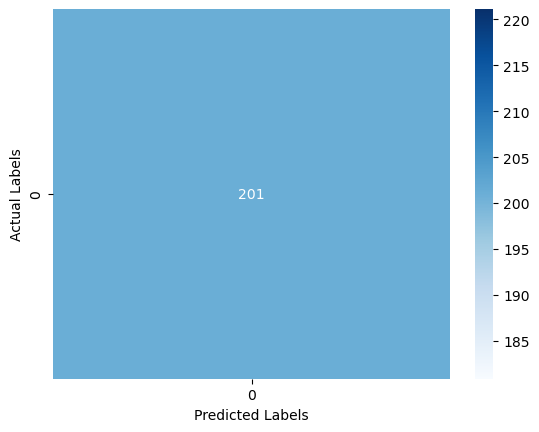

In [24]:
# Run a confusion matrix
print('Confusion Matrix Heat Map')
sns.heatmap(conf_matrix_df, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

***Generate Test data with new labels and then remove records "not belonging to known class" misclassified records

In [88]:
#pd.set_option('display.max_rows', None)
pd.reset_option("display.max_rows")
#pd.set_option("display.max_rows",26)

Y_Test

579    4
310    1
14     1
541    1
76     1
      ..
354    1
194    1
319    1
610    4
235    1
Name: Species, Length: 201, dtype: object

In [61]:
#Add class labels to the test data (X_Test) which has been Classified
#Y_Pred will have known and unknown classes (-1, 1) which are new labels for test data which had different classes 
#before i.e classes 1,2,3,4 carried by Y_Test
#X_Test= X_Test + Y_Pred(new class labels)
#Y_Pred - new class labels (-1,1) replacing orignal classes (1,2,3,4)


#Use the code below to add original class labels
#y_test = Y_Test

#y_test = pd.DataFrame(Y_Test)
#y_test['known_class'] = 1
#y_test = y_test.drop(['Colour'], axis = 1)


pred_classes = Y_Pred
pred_classes_df = pd.DataFrame(pred_classes, columns = ['Class_Label'])
#pred_classes_df

X_Test_first_pass = X_Test
Y_Test_first_pass = pd.DataFrame(Y_Test)

#Add new class labels (1,-1) to the test data which has been Classified so that we can remove the unknown classes
X_Test_first_pass['Class_Label'] = pred_classes_df.iloc[:,0].values

#Add Class labels to Y-Test data in order to remove "unknown tree species" labels
#display(Y_Test)
Y_Test_first_pass['Class_Label'] = pred_classes_df.iloc[:,0].values
Y_Test_first_pass.shape
display(Y_Test_first_pass)
#Y_Test_first_pass.head()
#Remove Y-Test records classified as unknown

print('pred_classes_df column shape is',pred_classes_df.shape, 'column types Y_Test ', Y_Test_first_pass.dtypes)


,Species,Class_Label
579,4,1
310,1,1
14,1,1
541,1,1
76,1,1
165,1,1
496,1,1
484,1,1
613,4,1
400,1,1


pred_classes_df column shape is (201, 1) column types Y_Test  Species        object
Class_Label    object
dtype: object


In [62]:
#Remove unknown class from the test data (Y_Test)

Y_Total_df = len(Y_Test_first_pass)
Y_known_class_df = len(Y_Test_first_pass[Y_Test_first_pass["Class_Label"]==1])
Y_unknown_class_df = len(Y_Test_first_pass[Y_Test_first_pass["Class_Label"]==-1])
print('Y-Total Trees:', Y_Total_df,   'Y-Known class:', Y_known_class_df, 'Y-Unknown Class:', Y_unknown_class_df)

#Removing the unknown species
Y_Test_first_pass.drop(Y_Test_first_pass[Y_Test_first_pass['Class_Label'] == -1].index, inplace = True)
#print('Y-Total Trees:', Y_Total_df,   'Y-Known class:', Y_known_class_df, 'Y-Unknown Class:', Y_unknown_class_df)
#Drop class label
Y_Test_known_species_df = Y_Test_first_pass.drop(['Class_Label'], axis=1)
display(Y_Test_known_species_df)

Y-Total Trees: 201 Y-Known class: 0 Y-Unknown Class: 0


,Species
579,4
310,1
14,1
541,1
76,1
165,1
496,1
484,1
613,4
400,1


In [63]:
#Remove records that do not belong to the class of known tree species

#X_Test_first_pass
# Do a record count before pruning the unkown tree species
total_df = len(X_Test_first_pass)
known_class_df = len(X_Test_first_pass[X_Test_first_pass["Class_Label"]==1])
unknown_class_df = len(X_Test_first_pass[X_Test_first_pass["Class_Label"]==-1])
print('Total Trees:', total_df,   ' Known class:',known_class_df, 'Unknown Class:', unknown_class_df)

#Removing the unknown species
#df.drop(df[df['Fee'] >= 24000].index, inplace = True)

X_Test_first_pass.drop(X_Test_first_pass[X_Test_first_pass['Class_Label'] == -1].index, inplace = True)
#display(X_Test_first_pass)


#Drop class label
#pca_trees_df = trees_df.drop(['ID','Species','Colour','x_coord','y_coord'], axis=1)
known_species_df = X_Test_first_pass.drop(['Class_Label'], axis=1)
display(known_species_df)



Total Trees: 201  Known class: 0 Unknown Class: 0


,PCA-1,PCA-2,PCA-3
579,0.954369,0.010070,-0.398841
310,-0.730433,0.018546,-0.188674
14,-0.263019,1.080059,0.240421
541,0.383658,-0.674168,1.433137
76,0.459293,-0.122179,-0.078410
165,-0.249341,0.425960,0.120119
496,-0.862877,-0.310444,-0.108143
484,1.135019,0.005898,-0.423678
613,0.564980,-0.035280,-0.358154
400,-0.738521,-0.463320,-0.256438


Train the multi-class classifier using labelled training data

In [107]:
# Use grid search to obtain the optimal parameters for the SVM model
from sklearn.svm import SVC
svm_model = SVC()

#Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 
#                       'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].


# define the cross-validation scheme
cv = 10

param_grid = {'kernel': ['rbf', 'sigmoid', 'linear'],'C': [5, 10, 15, 20],
              'random_state': [0, 1, 5],
              'gamma': [0.001, 0.01, 10, 12, 15, 20, 'scale', 'auto']}

# perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(estimator = svm_model, param_grid = param_grid, cv = cv, scoring = 'accuracy')
grid_search.fit(X_Train, Y_Train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [5, 10, 15, 20],
                         'gamma': [0.001, 0.01, 10, 12, 15, 20, 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear'],
                         'random_state': [0, 1, 5]},
             scoring='accuracy')

In [103]:
# print the best hyperparameters
print('Best hyperparameters for SVM:', grid_search.best_params_)

Best hyperparameters for SVM: {'C': 10, 'gamma': 15, 'kernel': 'rbf', 'random_state': 0}


In [110]:
# get the best hyperparameters and test the model
best_model = grid_search.best_estimator_
Y_Pred = best_model.predict(known_species_df)
#Y_Pred = pd.DataFrame(Y_Pred)
accuracy_svm = accuracy_score(Y_Test_known_species_df, Y_Pred)

#type(Y_Test)
#display(y_test)
#display(Y_Pred)

In [106]:
#Metrics
print('Optimal SVM model accuracy:', accuracy)
print('')
print('')

# Check the model performance
print(classification_report(Y_Test_known_species_df, Y_Pred))



OPtimal SVM model accuracy: 0.9104477611940298


              precision    recall  f1-score   support

           1       0.92      1.00      0.96       170
           2       0.60      0.30      0.40        10
           3       1.00      0.25      0.40         4
           4       0.82      0.53      0.64        17

    accuracy                           0.91       201
   macro avg       0.84      0.52      0.60       201
weighted avg       0.90      0.91      0.89       201



In [108]:
conf_matrix = confusion_matrix(Y_Test_known_species_df, Y_Pred)

# create the DataFrame with labels
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1,2,3
0,170,0,0,0
1,6,3,0,1
2,1,1,1,1
3,7,1,0,9


Confusion Matrix Heat Map


Text(50.722222222222214, 0.5, 'Actual Labels')

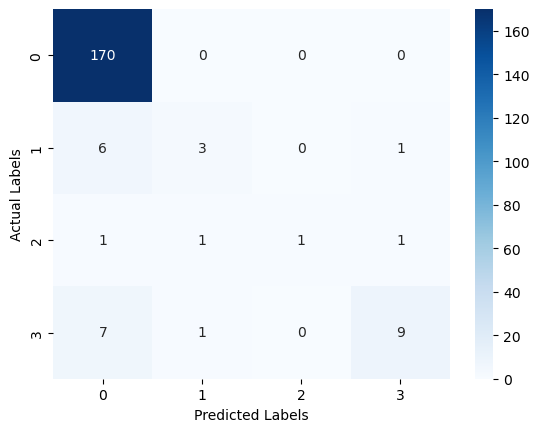

In [109]:
# Run a confusion matrix
print('Confusion Matrix Heat Map')
sns.heatmap(conf_matrix_df, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [78]:
from sklearn.svm import SVC
classifier_rbf_G = SVC(kernel= 'rbf', gamma = 15, C=12, random_state=0)
classifier_rbf_G.fit(X_Train, Y_Train)

#Y_Pred = classifier.predict(X_testgs)
Y_Pred = classifier_rbf_G.predict(known_species_df)

#Low value of gamma means that we are checking the distsnces of all datapoints from the margin 
#High value of gamma we are only checking the distsnce of points closer to the margin

print('Accuracy score with rbf & Gamma kernel')
#print(metrics.accuracy_score(Y_Test_known_species_df,Y_Pred))

print(classification_report(Y_Test_known_species_df, Y_Pred))
#tree_counts(Y_Test_known_species_df, Y_Pred)

#Y_Pred = classifier.predict(9,9,9)
#Y_Pred

Accuracy score with rbf & Gamma kernel
              precision    recall  f1-score   support

           1       0.92      1.00      0.96       170
           2       0.60      0.30      0.40        10
           3       1.00      0.25      0.40         4
           4       0.82      0.53      0.64        17

    accuracy                           0.91       201
   macro avg       0.84      0.52      0.60       201
weighted avg       0.90      0.91      0.89       201

